# Staking

TokenLab also supports the simulation of staking. In this example we will see a very simple token economy. We have data on the token supply, and forecasted revenues. The only action that the users can take is stake. This makes for a simplistic token economy, but will demonstrate how the staking functionality can be used. The stakes stake for 12 months. The main parameters are the cost of the slots, and the APY.


In [9]:
import os
import sys
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)
from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.supplyclasses import *
from TokenLab.simulationcomponents.addons import AddOn_RandomNoise, AddOn_RandomNoiseProportional
from TokenLab.utils.helpers import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np



In [10]:
ITERATIONS=60
HOLDING_TIME=12
INITIAL_PRICE=0.1
NFT_per_hive=1
STAKERS=600
SLOT_COST=80000
APY=0.05

When staking it is important to not use the actual circulating supply, but the new supply provided into the market. We will also need to define the parameter 'supply_is_added' to True in the TokenEconomy object below.

<AxesSubplot:>

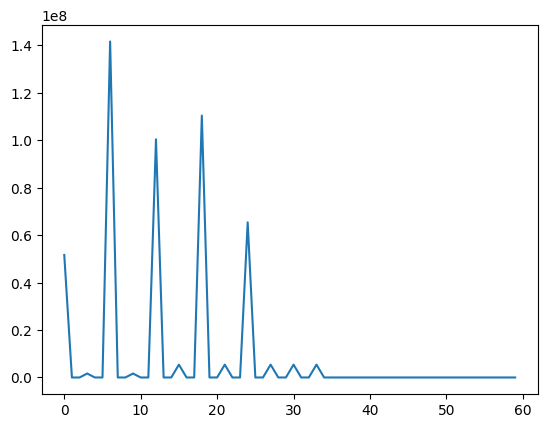

In [11]:
data=pd.read_csv('data.csv')
initial_value = data['Circulating Supply'].values[0]
diffs=data.loc[:,'Circulating Supply'].diff()
diffs[0]=initial_value
data.loc[:,'Circulating Supply']=diffs
data['Circulating Supply'].plot()

In [12]:
supply = SupplyController_FromData(data['Circulating Supply'].values)
forecasted_revenues = data['Slots']*SLOT_COST

assumptions=TransactionManagement_FromData(data=forecasted_revenues)
holding_time=HoldingTime_Stochastic()

stakers=[]
for i in range(STAKERS):
    stakers.append(SupplyStaker(SLOT_COST,SLOT_COST*APY,12))


100%|█████████████████████████████████████████| 100/100 [00:04<00:00, 24.09it/s]


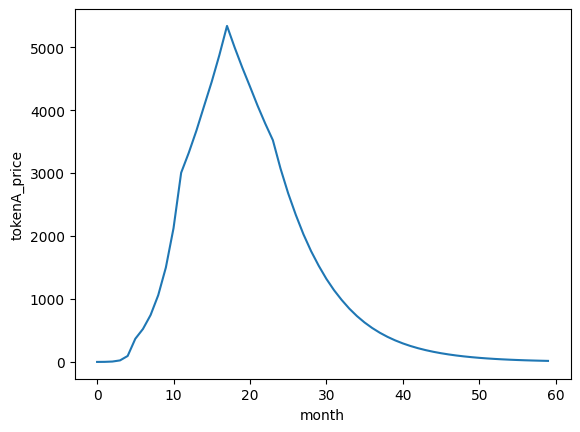

(<matplotlib.collections.PolyCollection at 0x7fb54828bd00>,
                 tokenA_price_mean  tokenA_price_median   sd    quant_10%  \
 iteration_time                                                             
 0                        0.398387             0.398387  0.0     0.398387   
 1                        1.587123             1.587123  0.0     1.587123   
 2                        6.322892             6.322892  0.0     6.322892   
 3                       24.501208            24.501208  0.0    24.501208   
 4                       94.942181            94.942181  0.0    94.942181   
 5                      367.900952           367.900952  0.0   367.900952   
 6                      523.551355           523.551355  0.0   523.551355   
 7                      745.053851           745.053851  0.0   745.053851   
 8                     1060.268942          1060.268942  0.0  1060.268942   
 9                     1500.550113          1500.550113  0.0  1500.550113   
 10             

In [13]:
supply = SupplyController_FromData(data['Circulating Supply'].dropna().values)

ap_fiat=AgentPool_Staking(users_controller=STAKERS,transactions_controller=50000,currency='tokenA',
                          staking_controller=SupplyStaker,staking_controller_params={'staking_amount':SLOT_COST,
                                                                                     'rewards':SLOT_COST*APY,
                                                                                     'lockup_duration':12})


te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=supply,token='tokenA',supply_is_added=True,
                      initial_price=INITIAL_PRICE,burn_token=False,
                      price_function_parameters={'smoothing_param':0.5})

te.add_agent_pools([ap_fiat])

meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=100)
reps=meta.get_data()

meta.get_timeseries('tokenA_price')

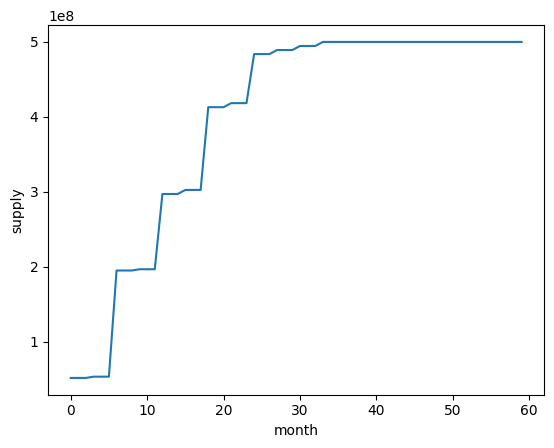

(<matplotlib.collections.PolyCollection at 0x7fb5082ed8b0>,
                  supply_mean  supply_median   sd     quant_10%     quant_90%  \
 iteration_time                                                                 
 0               5.166667e+07   5.166667e+07  0.0  5.166667e+07  5.166667e+07   
 1               5.166667e+07   5.166667e+07  0.0  5.166667e+07  5.166667e+07   
 2               5.166667e+07   5.166667e+07  0.0  5.166667e+07  5.166667e+07   
 3               5.333333e+07   5.333333e+07  0.0  5.333333e+07  5.333333e+07   
 4               5.333333e+07   5.333333e+07  0.0  5.333333e+07  5.333333e+07   
 5               5.333333e+07   5.333333e+07  0.0  5.333333e+07  5.333333e+07   
 6               1.950000e+08   1.950000e+08  0.0  1.950000e+08  1.950000e+08   
 7               1.950000e+08   1.950000e+08  0.0  1.950000e+08  1.950000e+08   
 8               1.950000e+08   1.950000e+08  0.0  1.950000e+08  1.950000e+08   
 9               1.966667e+08   1.966667e+08  0.0

In [14]:
meta.get_timeseries('supply')

In [15]:
data

,Month,Circulating Supply,Slots
0,1,5.166667e+07,1000.000000
1,2,0.000000e+00,1050.000000
2,3,0.000000e+00,1100.000000
3,4,1.666667e+06,1150.000000
4,5,0.000000e+00,1200.000000
5,6,0.000000e+00,1260.000000
6,7,1.416667e+08,1320.000000
7,8,0.000000e+00,1380.000000
8,9,0.000000e+00,1440.000000
9,10,1.666667e+06,1512.000000
